In [6]:
loaded_data = "./data/sms_spam_indo.csv"

In [7]:
import pandas as pd
import matplotlib.pyplot as pl
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pltn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tkinter as tk
import matplotlib.pyplot as plt

# pip install -r requirments.txt


In [8]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from transformers import AutoModelForSequenceClassification
from transformers import Trainer
from datasets import load_metric

In [9]:
# load data
df = pd.read_csv(loaded_data)
df.head()

,Kategori,Pesan
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(
2,ham,Kalau mau bikin model/controller mending per a...
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...


Prepocessing Data

In [10]:
df['label'] = df['Kategori'].apply(lambda x:0 if x=="ham" else 1)


In [11]:
df = df.drop(columns=['Kategori'])
df.rename(columns={"Pesan": "Teks"}, inplace=True)
df

,Teks,label
0,Plg Yth: Simcard anda mendptkan bonus poin plu...,1
1,Iya ih ko sedih sih gtau kapan lg ke bandung :(,0
2,Kalau mau bikin model/controller mending per a...,0
3,Selamat nama1. Semoga selalu menempuh hidup ya...,0
4,Tingkatkan nilai isi ulang Anda selanjutnya mi...,1
...,...,...
1138,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,0
1139,"Semangat yang ibu gita, ibu putri dan bapak ad...",0
1140,"nama1, minta database kamu sama view dan contr...",0
1141,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,1


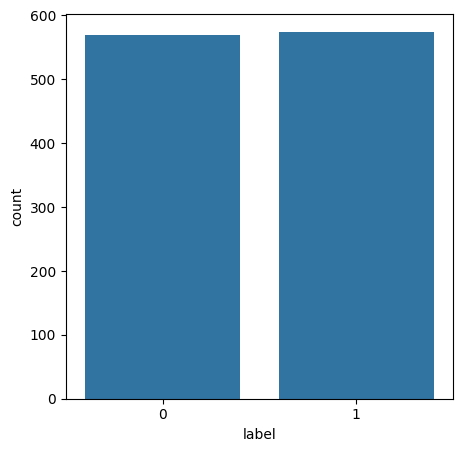

In [12]:
  # check count and unique and top values and their frequency
  plt.figure(figsize=(5, 5))
  sns.countplot(x=df['label'])
  plt.show()

In [13]:
df['label'].value_counts()

label
1    574
0    569
Name: count, dtype: int64

In [14]:
df.sample(10)

,Teks,label
835,soal ada multiple choice ada essay. Yg weka ma...,0
440,BONUS PULSA Rp 100 rb..!! Spesial untuk kamu p...,1
1098,"Info Gempa Mag:5.3 SR, 21-Jun-16 21:10:23 WIB,...",0
38,Jam 8 berangkat aja gmn teh,0
374,"nama1 titip pesan, jumat pagi kita kumpul tru...",0
790,"BANTING HARGA !! Internetan dgn Kuota 1,5GB HA...",1
900,maaf kami sudah menghubungi tpi tdk tersmbung ...,1
15,Terimakasih. Paket 60 mb Anda telah aktif. Cek...,0
913,Paket Anda sudah di non-aktifkan atas perminta...,1
915,Itu namanya ap nur? Tokopedi bukalapak lumayan...,0


In [15]:
df['Teks']=df['Teks'].str.lower()
df

,Teks,label
0,plg yth: simcard anda mendptkan bonus poin plu...,1
1,iya ih ko sedih sih gtau kapan lg ke bandung :(,0
2,kalau mau bikin model/controller mending per a...,0
3,selamat nama1. semoga selalu menempuh hidup ya...,0
4,tingkatkan nilai isi ulang anda selanjutnya mi...,1
...,...,...
1138,yg ragu sm bulet/datar atau yg pgn ikutan deba...,0
1139,"semangat yang ibu gita, ibu putri dan bapak ad...",0
1140,"nama1, minta database kamu sama view dan contr...",0
1141,dapatkan gratis 1 cappuccino (hot/ice) & freza...,1


In [16]:
import re

In [17]:
def clean_text(words):
      """The function to clean text"""
      words = re.sub("[^a-zA-Z]"," ", words)
      text = words.lower().split()
      return " ".join(text)

In [18]:
df['Teks']=df['Teks'].apply(clean_text)
df

,Teks,label
0,plg yth simcard anda mendptkan bonus poin plus...,1
1,iya ih ko sedih sih gtau kapan lg ke bandung,0
2,kalau mau bikin model controller mending per a...,0
3,selamat nama semoga selalu menempuh hidup yang...,0
4,tingkatkan nilai isi ulang anda selanjutnya mi...,1
...,...,...
1138,yg ragu sm bulet datar atau yg pgn ikutan deba...,0
1139,semangat yang ibu gita ibu putri dan bapak adi...,0
1140,nama minta database kamu sama view dan control...,0
1141,dapatkan gratis cappuccino hot ice freza setia...,1


In [19]:
def cleaning_text(text):
    return text.translate(str.maketrans("","",string.punctuation))
    return text.strip()
    return re.sub('\s+',' ',text)
    return re.sub(r"\b[a-zA-Z]\b", "", text)

In [20]:
df['Teks']=df['Teks'].apply(clean_text)
df

,Teks,label
0,plg yth simcard anda mendptkan bonus poin plus...,1
1,iya ih ko sedih sih gtau kapan lg ke bandung,0
2,kalau mau bikin model controller mending per a...,0
3,selamat nama semoga selalu menempuh hidup yang...,0
4,tingkatkan nilai isi ulang anda selanjutnya mi...,1
...,...,...
1138,yg ragu sm bulet datar atau yg pgn ikutan deba...,0
1139,semangat yang ibu gita ibu putri dan bapak adi...,0
1140,nama minta database kamu sama view dan control...,0
1141,dapatkan gratis cappuccino hot ice freza setia...,1


In [21]:
def remove_tweet_special(text):
      # remove tab, new line, ans back slice
      text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
      # remove non ASCII (emoticon, chinese word, .etc)
      text = text.encode('ascii', 'replace').decode('ascii')
      # remove mention, link, hashtag
      text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
      # remove incomplete URL
      return text.replace("http://", " ").replace("https://", " ")

In [22]:
df['Teks']=df['Teks'].apply(remove_tweet_special)
df

,Teks,label
0,plg yth simcard anda mendptkan bonus poin plus...,1
1,iya ih ko sedih sih gtau kapan lg ke bandung,0
2,kalau mau bikin model controller mending per a...,0
3,selamat nama semoga selalu menempuh hidup yang...,0
4,tingkatkan nilai isi ulang anda selanjutnya mi...,1
...,...,...
1138,yg ragu sm bulet datar atau yg pgn ikutan deba...,0
1139,semangat yang ibu gita ibu putri dan bapak adi...,0
1140,nama minta database kamu sama view dan control...,0
1141,dapatkan gratis cappuccino hot ice freza setia...,1


Split Data

In [23]:
RANDOM_SEED = 42

df_train, df_test = train_test_split(
    df,
    test_size=0.2,
    random_state=RANDOM_SEED,
)

df_val, df_test = train_test_split(
    df_test,
    test_size=0.4,
    random_state=RANDOM_SEED,
)

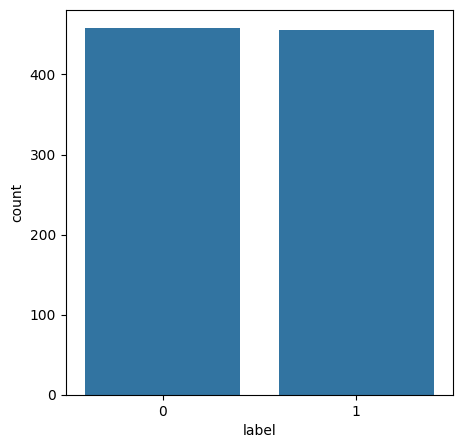

In [24]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_train['label'])
plt.show()

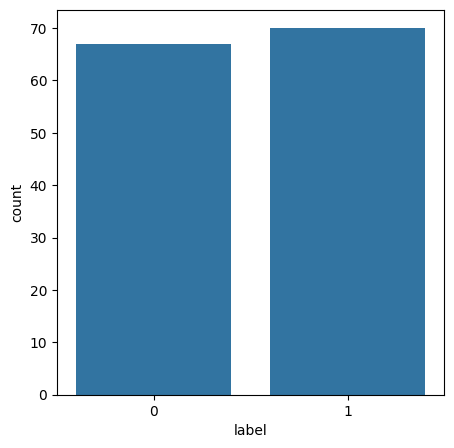

In [25]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_val['label'])
plt.show()

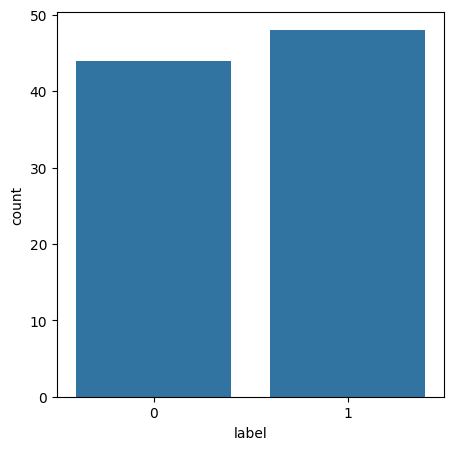

In [26]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_test['label'])
plt.show()

In [27]:
print(f'Total Train: {len(df_train)}')
print(f'Total Val  : {len(df_val)}')
print(f'Total Test : {len(df_test)}')

Total Train: 914
Total Val  : 137
Total Test : 92


In [28]:
df_train.to_csv("train.csv", index=False)
df_val.to_csv("eval.csv", index=False)
df_test.to_csv("test.csv", index=False)

# Load Dataset

In [29]:
from datasets import load_dataset

files = {
  "train": "train.csv",
  "eval": "eval.csv",
  "test": "test.csv",
}

dataset = load_dataset('csv', data_files=files)

Generating train split: 914 examples [00:00, 12052.22 examples/s]
Generating eval split: 137 examples [00:00, 15227.76 examples/s]
Generating test split: 92 examples [00:00, 11229.08 examples/s]


# Tokenization

In [30]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")

d:\Nanang Punya\Kuliah\h\.venv\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Redmi_PC\.cache\huggingface\hub\models--indobenchmark--indobert-base-p2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
d:\Nanang Punya\Kuliah\h\.venv\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarnin

In [31]:
def tokenize_function(text):
  return tokenizer(text["Teks"], padding='max_length', max_length=256)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/914 [00:00<?, ? examples/s]

Map: 100%|██████████| 92/92 [00:00<00:00, 2094.66 examples/s]


In [32]:
train_dataset = tokenized_datasets["train"]
eval_dataset = tokenized_datasets["eval"]

In [33]:
import torch
torch.cuda.empty_cache()

device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Define Model and Trainer:

In [34]:
model = AutoModelForSequenceClassification.from_pretrained("indobenchmark/indobert-base-p2", num_labels=3)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [35]:
from transformers import TrainingArguments
from torch import clamp

training_args = TrainingArguments(
    "test_trainer",
        per_device_train_batch_size=4,
        )

In [36]:
metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    return metric.compute(predictions=predictions, references=labels)

torch.cuda.empty_cache()

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

training_history = trainer.train()

C:\Users\Redmi_PC\AppData\Local\Temp\ipykernel_2756\2155933744.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")
d:\Nanang Punya\Kuliah\h\.venv\lib\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.2/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
 73%|███████▎  | 500/687 [1:33:56<29:04,  9.33s/it]  

{'loss': 0.1748, 'grad_norm': 0.006725112907588482, 'learning_rate': 1.3609898107714703e-05, 'epoch': 2.18}


100%|██████████| 687/687 [2:04:40<00:00, 10.89s/it]


{'train_runtime': 7480.5686, 'train_samples_per_second': 0.367, 'train_steps_per_second': 0.092, 'train_loss': 0.13972809498660602, 'epoch': 3.0}


# Train and Evaluate Model:

In [37]:
evaluation_history = trainer.evaluate()
evaluation_history

100%|██████████| 18/18 [01:46<00:00,  5.94s/it]


{'eval_loss': 0.014126737602055073,
 'eval_accuracy': 0.9927007299270073,
 'eval_runtime': 114.7504,
 'eval_samples_per_second': 1.194,
 'eval_steps_per_second': 0.157,
 'epoch': 3.0}

# Prediction:

In [38]:
test_dataset = tokenized_datasets["test"]

prediction = trainer.predict(test_dataset)
prediction = prediction.predictions.argmax(1)

100%|██████████| 12/12 [01:41<00:00,  8.42s/it]


In [39]:
actual_label = df_test['label']

In [40]:
print(classification_report(prediction, actual_label, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        47
           1       0.94      1.00      0.97        45

    accuracy                           0.97        92
   macro avg       0.97      0.97      0.97        92
weighted avg       0.97      0.97      0.97        92



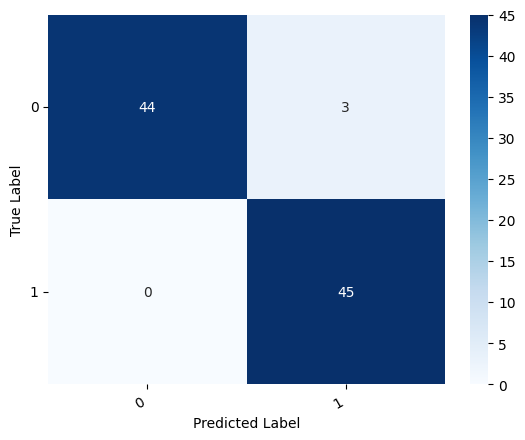

In [41]:
def show_confusion_matrix(confusion_matrix):
        hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
        hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
        hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')

        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

cm = confusion_matrix(prediction, actual_label)
show_confusion_matrix(cm)

# Save and Load Model:

In [42]:
model.save_pretrained("model")

In [43]:
model = AutoModelForSequenceClassification.from_pretrained("model")

In [44]:
trainer = Trainer(model=model)

In [45]:
def predict(text):
    tokenized = tokenizer(text, padding='max_length', max_length=256)
    label = trainer.predict([tokenized]).predictions.argmax(1)[0]
    if label == 0:
        print(f'Predicted: Ham [{label}]')
    else:
        print(f'Predicted: Spam [{label}]')

In [46]:
predict("""Maaf perpanjangan otomatis paketmu gagal krn pulsa tdk cukup/sdg dlm masa tenggang.
Segera isi pulsa &aktifkan Paket internet di *123# ,myIM3 bit.ly/tuttm3 """)

100%|██████████| 1/1 [00:00<00:00, 1027.51it/s]

Predicted: Spam [1]


In [47]:
predict("""
halo teman2 jangan lupa ya yg sudah selesai tugasnya bisa d kirim kesini

yg kemarin emailnya typo ternyata kalo yg sudah kirim bisa kirim ulang ya teman2

""")

100%|██████████| 1/1 [00:00<?, ?it/s]

Predicted: Ham [0]


In [48]:
import pickle

def save_module(module, filename):
    with open(filename, 'wb') as file:
        pickle.dump(module, file)

# Penggunaan fungsi
module_name = 'BismillahPIBisa'
save_module(module_name, 'Module.pkl')


Meload Model

In [49]:
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer

# Definisikan path ke model yang telah disimpan
model_path = "model"
tokenizer_path = "indobenchmark/indobert-base-p2"

# Muat tokenizer dan model
tokenizer = AutoTokenizer.from_pretrained(tokenizer_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Definisikan perangkat yang akan digunakan (GPU jika tersedia)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Definisikan fungsi prediksi
def predict(text):
    inputs = tokenizer(text, return_tensors="pt", padding='max_length', max_length=256)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=-1).item()

    if predictions == 0:
        return f'Predicted: Ham [{predictions}]'
    else:
        return f'Predicted: Spam [{predictions}]'

# Meminta input dari pengguna
user_input = input("Masukkan teks yang ingin diprediksi: ")

# Melakukan prediksi dan menampilkan hasil
result = predict(user_input)
print(result)


Predicted: Ham [0]


In [50]:
#mengubah folder model menjadi ZIP/RAR
!zip -r /content/model.zip /content/model/

zip warning: name not matched: /content/model/

zip error: Nothing to do! (try: zip -r /content/model.zip . -i /content/model/)
